# PACKAGES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from itertools import chain
from unidecode import unidecode

# FILES

In [3]:
customers_files = ['http://rocker-data-engineering-task.storage.googleapis.com/data/customers.json']

loans_files = [
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2017-10.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2017-11.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2017-12.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-1.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-10.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-11.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-12.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-2.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-3.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-4.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-5.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-6.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-7.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-8.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2018-9.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-1.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-10.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-2.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-3.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-4.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-5.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-6.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-7.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-8.csv',
    'http://rocker-data-engineering-task.storage.googleapis.com/data/loan-2019-9.csv',
]

visits_files=['http://rocker-data-engineering-task.storage.googleapis.com/data/visits.csv']

# FILES READING

## customers

In [4]:
customers = pd.read_json(customers_files[0], lines=True); customers.head()

id                     name          ssn    birthday gender  \
0  20427847        Μάριος Γαρουφαλής  172-10-3586  1978-05-09      F   
1  74075652     Μόσχα Διαμαντοπούλου  140-57-5668  1994-03-05      F   
2  31170608      Κλυταιμνήστρα Πέτση  548-79-9954  1971-08-24      M   
3  39640871     Ευγενία Στρατογιάννη  036-43-6966  1988-12-19      M   
4  60718455  Χαρίτος-Τίμων Τσατσάνης  467-48-0823  1989-07-21      F   

          city   zip_code  
0      Γρεβενά  ΤΚ 763 78  
1     Κομοτηνή      75665  
2      Φλώρινα   ΤΚ 49056  
3      Φλώρινα      65934  
4  Θεσσαλονίκη   ΤΚ 38335

In [5]:
len(customers)

10000

## visits

In [6]:
visits = pd.read_csv(visits_files[0]);visits.head()

Unnamed: 0        id   timestamp  referrer campaign_name
0           0  80139861  1533681013   Twitter      display1
1           1  80139861  1510371179  Facebook      display1
2           2  32212575  1523416988    Google      display2
3           3  32212575  1512331218  Facebook      display3
4           4  32212575  1537734220    Google      display2

In [7]:
len(visits)

11184

## loans

In [8]:
loans_import = list()

for l in loans_files:
    loans_import.append(pd.read_csv(l))

In [9]:
loans = pd.concat(loans_import, ignore_index=True)

In [10]:
loans.head()

Unnamed: 0        id   user_id   timestamp  loan_amount  \
0          12   9546870  33593540  1509162149        80000   
1          28  36469880  41352735  1508888134       270000   
2          99  22554526  70055796  1507064389       240000   
3         117  27906548  17577009  1508660627       190000   
4         121  46601919  15988868  1508586823        20000   

               loan_purpose   outcome  interest  webvisit_id  
0              Buying a pet  ACCEPTED       8.7          NaN  
1  Refinance existing loans  REJECTED       6.7  (72572646,)  
2             Home purchase  ACCEPTED       7.0  (54404642,)  
3              Buying a pet  REJECTED      14.0          NaN  
4             Home purchase  REJECTED      14.0          NaN

In [11]:
len(loans)

14517

# FIRST ANALYSIS

In [12]:
# here we make a first analysis about duplicata, missing values, length etc

## customers

In [13]:
customers.head()

id                     name          ssn    birthday gender  \
0  20427847        Μάριος Γαρουφαλής  172-10-3586  1978-05-09      F   
1  74075652     Μόσχα Διαμαντοπούλου  140-57-5668  1994-03-05      F   
2  31170608      Κλυταιμνήστρα Πέτση  548-79-9954  1971-08-24      M   
3  39640871     Ευγενία Στρατογιάννη  036-43-6966  1988-12-19      M   
4  60718455  Χαρίτος-Τίμων Τσατσάνης  467-48-0823  1989-07-21      F   

          city   zip_code  
0      Γρεβενά  ΤΚ 763 78  
1     Κομοτηνή      75665  
2      Φλώρινα   ΤΚ 49056  
3      Φλώρινα      65934  
4  Θεσσαλονίκη   ΤΚ 38335

In [14]:
len(customers)

10000

In [15]:
customers.id.value_counts().head() # one id refers to two differents customers

81570228    2
20427847    1
26338153    1
51418161    1
20302982    1
Name: id, dtype: int64

In [16]:
customers[customers['id'] == 81570228] # same id but different person

id                       name          ssn    birthday gender  \
5792  81570228            Μηνάς Σαμανίδης  016-05-9161  1985-12-17      M   
6852  81570228  Ιππόλυτος Παπαδημητριάδης  428-19-7759  1978-10-05      M   

         city zip_code  
5792  Πρέβεζα   568 75  
6852    Ξάνθη   573 32

In [17]:
customers.isna().sum() # no missing values

id          0
name        0
ssn         0
birthday    0
gender      0
city        0
zip_code    0
dtype: int64

## visits

In [18]:
visits.head()

Unnamed: 0        id   timestamp  referrer campaign_name
0           0  80139861  1533681013   Twitter      display1
1           1  80139861  1510371179  Facebook      display1
2           2  32212575  1523416988    Google      display2
3           3  32212575  1512331218  Facebook      display3
4           4  32212575  1537734220    Google      display2

In [19]:
len(visits)

11184

In [20]:
visits.isna().sum()

Unnamed: 0       0
id               0
timestamp        0
referrer         0
campaign_name    0
dtype: int64

In [21]:
visits.id.value_counts() 

96071634    5
65005372    5
80825687    5
36077198    5
87521502    5
           ..
72124994    1
86569062    1
80461880    1
68151273    1
95015820    1
Name: id, Length: 3740, dtype: int64

In [22]:
# so we can say that maybe, for one loan, a user has the same webvisit id

## loans

In [23]:
len(loans)

14517

In [24]:
loans.head()

Unnamed: 0        id   user_id   timestamp  loan_amount  \
0          12   9546870  33593540  1509162149        80000   
1          28  36469880  41352735  1508888134       270000   
2          99  22554526  70055796  1507064389       240000   
3         117  27906548  17577009  1508660627       190000   
4         121  46601919  15988868  1508586823        20000   

               loan_purpose   outcome  interest  webvisit_id  
0              Buying a pet  ACCEPTED       8.7          NaN  
1  Refinance existing loans  REJECTED       6.7  (72572646,)  
2             Home purchase  ACCEPTED       7.0  (54404642,)  
3              Buying a pet  REJECTED      14.0          NaN  
4             Home purchase  REJECTED      14.0          NaN

In [25]:
loans.isna().sum()

Unnamed: 0          0
id                  0
user_id             0
timestamp           0
loan_amount         0
loan_purpose        0
outcome             0
interest            0
webvisit_id     10192
dtype: int64

In [26]:
# so we got 10192 NA out of 14517 rows on webvisit_id

In [27]:
f'percentage of NA in the webvisit_id column: {np.round(loans.webvisit_id.isna().sum()/len(loans)*100,1)}'

'percentage of NA in the webvisit_id column: 70.2'

# DATAFRAMES CLEANING

## customers

In [28]:
customers = customers.rename(columns={"id": "user_id"})

In [29]:
# add year_birthday feature for customers data analysis

In [30]:
customers['year_birthday'] = customers['birthday'].str[:4]

In [31]:
customers['year_birthday'] = customers['year_birthday'].astype(int)

In [32]:
# cleaning of zip_code, deleting of TK ('postal_code') before some zip code and spaces

In [33]:
customers['zip_code'] = customers['zip_code'].apply(lambda x: x[3:] if len(x)>5 else x)

In [34]:
def zip_code_norm(z):
    lchar = list(z)
    z2 = ''.join(lchar[:3] + [' '] + lchar[3:])
    return z2

In [35]:
customers['zip_code'] = customers['zip_code'].apply(lambda x: zip_code_norm(x) if len(x) == 5 else x)

In [36]:
customers['city_ascii'] = customers['city'].apply(lambda x: unidecode(x))

In [37]:
# zip code here are not the right for these cities

In [38]:
customers.head()

user_id                     name          ssn    birthday gender  \
0  20427847        Μάριος Γαρουφαλής  172-10-3586  1978-05-09      F   
1  74075652     Μόσχα Διαμαντοπούλου  140-57-5668  1994-03-05      F   
2  31170608      Κλυταιμνήστρα Πέτση  548-79-9954  1971-08-24      M   
3  39640871     Ευγενία Στρατογιάννη  036-43-6966  1988-12-19      M   
4  60718455  Χαρίτος-Τίμων Τσατσάνης  467-48-0823  1989-07-21      F   

          city zip_code  year_birthday    city_ascii  
0      Γρεβενά   763 78           1978       Grebena  
1     Κομοτηνή   756 65           1994      Komotene  
2      Φλώρινα   490 56           1971      Phlorina  
3      Φλώρινα   659 34           1988      Phlorina  
4  Θεσσαλονίκη   383 35           1989  Thessalonike

## visits

In [39]:
visits = visits.iloc[:, 1:].rename(columns={"id": "visit_id"}) # we delete the first column, useless

In [40]:
# timestamp to date

In [41]:
visits['datetime'] = visits.timestamp.apply(lambda x: datetime.fromtimestamp(x))

In [42]:
visits['date'] = visits['datetime'].apply(lambda x: x.date())

In [43]:
visits['month'] = pd.to_datetime(visits['date']).dt.strftime('%Y-%m')

In [44]:
visits = visits.sort_values(by='date')

In [45]:
#visits['month'] = visits['month'].astype(int)

In [46]:
visits.head()

visit_id   timestamp  referrer campaign_name            datetime  \
9969  87990689  1506867358  Facebook      display1 2017-10-01 16:15:58   
2519   7258110  1506854769   Twitter      display3 2017-10-01 12:46:09   
3310  95721734  1506865754    Google      display3 2017-10-01 15:49:14   
4147  88482131  1506866360    Google      display3 2017-10-01 15:59:20   
1719  34858442  1506853101   Twitter      display2 2017-10-01 12:18:21   

            date    month  
9969  2017-10-01  2017-10  
2519  2017-10-01  2017-10  
3310  2017-10-01  2017-10  
4147  2017-10-01  2017-10  
1719  2017-10-01  2017-10

In [47]:
visits['visit_id'] = visits['visit_id'].astype(str) # to fit with the webvisit id in loans df

## loans

In [48]:
loans = loans.rename(columns={"id": "loan_id"})

In [49]:
loans = loans.iloc[:, 1:]

In [50]:
loans["webvisit_id"] = np.where(loans["webvisit_id"].isna(), 
                                       '-1', loans["webvisit_id"])

In [51]:
loans.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  36469880  41352735  1508888134       270000  Refinance existing loans   
2  22554526  70055796  1507064389       240000             Home purchase   
3  27906548  17577009  1508660627       190000              Buying a pet   
4  46601919  15988868  1508586823        20000             Home purchase   

    outcome  interest  webvisit_id  
0  ACCEPTED       8.7           -1  
1  REJECTED       6.7  (72572646,)  
2  ACCEPTED       7.0  (54404642,)  
3  REJECTED      14.0           -1  
4  REJECTED      14.0           -1

In [52]:
loans['webvisit_id'] = np.where(loans["webvisit_id"] =='-1', '-1', loans["webvisit_id"].str[1:-2])

In [53]:
loans.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  36469880  41352735  1508888134       270000  Refinance existing loans   
2  22554526  70055796  1507064389       240000             Home purchase   
3  27906548  17577009  1508660627       190000              Buying a pet   
4  46601919  15988868  1508586823        20000             Home purchase   

    outcome  interest webvisit_id  
0  ACCEPTED       8.7          -1  
1  REJECTED       6.7    72572646  
2  ACCEPTED       7.0    54404642  
3  REJECTED      14.0          -1  
4  REJECTED      14.0          -1

In [54]:
# timestamp to date

In [55]:
loans['datetime'] = loans['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [56]:
loans['date'] = loans['datetime'].apply(lambda x: x.date())

In [57]:
loans['loan_purpose'] = loans['loan_purpose'].replace({'buying a pet': 'Buying a pet', 'home purchase': 'Home purchase'})

In [58]:
loans.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  36469880  41352735  1508888134       270000  Refinance existing loans   
2  22554526  70055796  1507064389       240000             Home purchase   
3  27906548  17577009  1508660627       190000              Buying a pet   
4  46601919  15988868  1508586823        20000             Home purchase   

    outcome  interest webvisit_id            datetime        date  
0  ACCEPTED       8.7          -1 2017-10-28 05:42:29  2017-10-28  
1  REJECTED       6.7    72572646 2017-10-25 01:35:34  2017-10-25  
2  ACCEPTED       7.0    54404642 2017-10-03 22:59:49  2017-10-03  
3  REJECTED      14.0          -1 2017-10-22 10:23:47  2017-10-22  
4  REJECTED      14.0          -1 2017-10-21 13:53:43  2017-10-21

# DATA ANALYSIS

## customers

In [59]:
customers.head()

user_id                     name          ssn    birthday gender  \
0  20427847        Μάριος Γαρουφαλής  172-10-3586  1978-05-09      F   
1  74075652     Μόσχα Διαμαντοπούλου  140-57-5668  1994-03-05      F   
2  31170608      Κλυταιμνήστρα Πέτση  548-79-9954  1971-08-24      M   
3  39640871     Ευγενία Στρατογιάννη  036-43-6966  1988-12-19      M   
4  60718455  Χαρίτος-Τίμων Τσατσάνης  467-48-0823  1989-07-21      F   

          city zip_code  year_birthday    city_ascii  
0      Γρεβενά   763 78           1978       Grebena  
1     Κομοτηνή   756 65           1994      Komotene  
2      Φλώρινα   490 56           1971      Phlorina  
3      Φλώρινα   659 34           1988      Phlorina  
4  Θεσσαλονίκη   383 35           1989  Thessalonike

In [60]:
len(customers.year_birthday.unique())

27

In [61]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = customers, x = 'year_birthday', bins=27)
# balanced distribution between the different birthday year of customers, except for the year 1995

plt.subplot(1, 2, 2)
cts = Counter(chain.from_iterable(customers.gender.str.split('|').values))
plt.pie(cts.values(), labels=cts.keys(), autopct='%1.2f%%')
plt.ylabel('Gender')
# balanced distribution between the two genders

plt.show()

## visits

In [62]:
visits.head()

visit_id   timestamp  referrer campaign_name            datetime  \
9969  87990689  1506867358  Facebook      display1 2017-10-01 16:15:58   
2519   7258110  1506854769   Twitter      display3 2017-10-01 12:46:09   
3310  95721734  1506865754    Google      display3 2017-10-01 15:49:14   
4147  88482131  1506866360    Google      display3 2017-10-01 15:59:20   
1719  34858442  1506853101   Twitter      display2 2017-10-01 12:18:21   

            date    month  
9969  2017-10-01  2017-10  
2519  2017-10-01  2017-10  
3310  2017-10-01  2017-10  
4147  2017-10-01  2017-10  
1719  2017-10-01  2017-10

In [63]:
len(visits.month.unique())

25

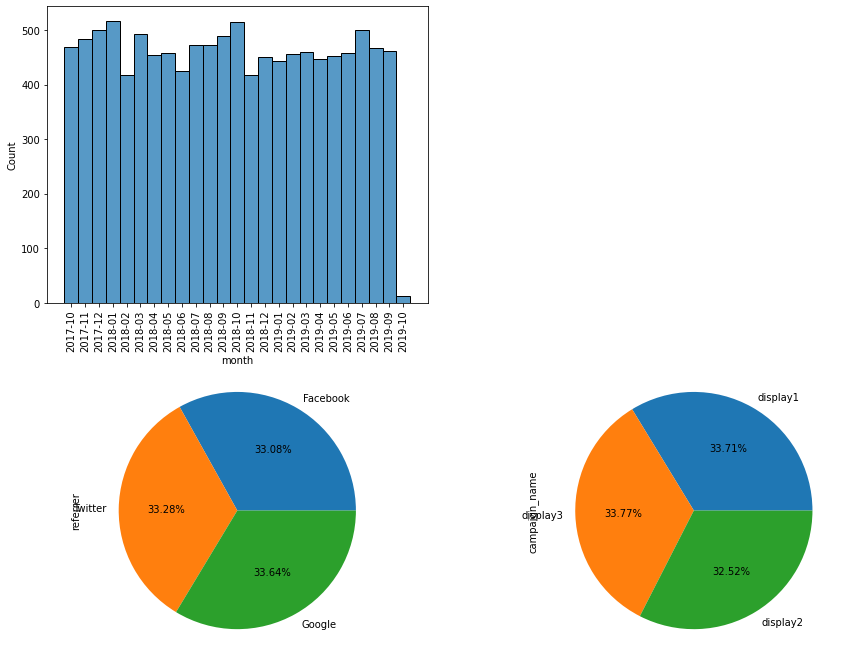

In [64]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.histplot(data = visits, x = 'month', bins=25)
plt.xticks(rotation=90)
# balanced distribution between the different month of visits

plt.subplot(2, 2, 3)
cts = Counter(chain.from_iterable(visits.referrer.str.split('|').values))
plt.pie(cts.values(), labels=cts.keys(), autopct='%1.2f%%')
plt.ylabel('referrer')



plt.subplot(2, 2, 4)
cts = Counter(chain.from_iterable(visits.campaign_name.str.split('|').values))
plt.pie(cts.values(), labels=cts.keys(), autopct='%1.2f%%')
plt.ylabel('campaign_name')

plt.show()

## loans

In [65]:
loans.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  36469880  41352735  1508888134       270000  Refinance existing loans   
2  22554526  70055796  1507064389       240000             Home purchase   
3  27906548  17577009  1508660627       190000              Buying a pet   
4  46601919  15988868  1508586823        20000             Home purchase   

    outcome  interest webvisit_id            datetime        date  
0  ACCEPTED       8.7          -1 2017-10-28 05:42:29  2017-10-28  
1  REJECTED       6.7    72572646 2017-10-25 01:35:34  2017-10-25  
2  ACCEPTED       7.0    54404642 2017-10-03 22:59:49  2017-10-03  
3  REJECTED      14.0          -1 2017-10-22 10:23:47  2017-10-22  
4  REJECTED      14.0          -1 2017-10-21 13:53:43  2017-10-21

In [66]:
loans.loan_purpose.unique()

array(['Buying a pet', 'Refinance existing loans', 'Home purchase'],
      dtype=object)

In [67]:
loans.loan_purpose.value_counts()

Buying a pet                5290
Refinance existing loans    5212
Home purchase               4015
Name: loan_purpose, dtype: int64

In [68]:
loans.groupby('loan_purpose')['loan_amount'].mean()

loan_purpose
Buying a pet                162166.351607
Home purchase               164435.865504
Refinance existing loans    163981.197237
Name: loan_amount, dtype: float64

In [74]:
loans.groupby('loan_purpose')['loan_amount'].var()

loan_purpose
Buying a pet                7.900770e+09
Home purchase               7.942924e+09
Refinance existing loans    7.899806e+09
Name: loan_amount, dtype: float64

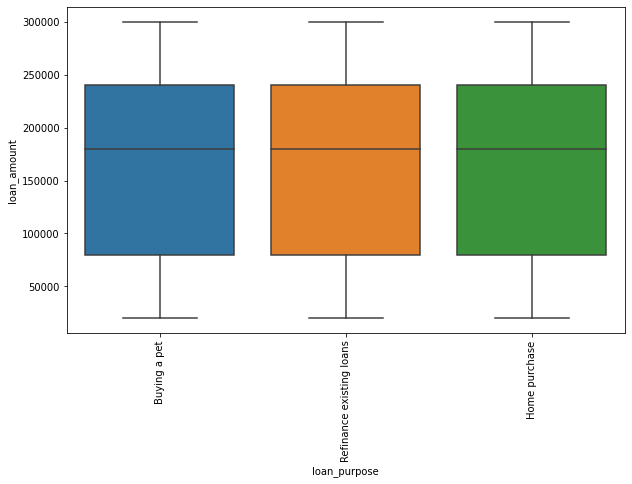

In [70]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=loans, x="loan_purpose", y="loan_amount")
plt.xticks(rotation=90)
plt.show()

In [75]:
# a surprising result, surely erroneous data, because these three loan reason has almost the same loan amount mean and var

In [76]:
loans.interest.describe()

count    14517.000000
mean         9.123352
std          2.938509
min          6.700000
25%          7.000000
50%          8.700000
75%         14.000000
max         14.000000
Name: interest, dtype: float64

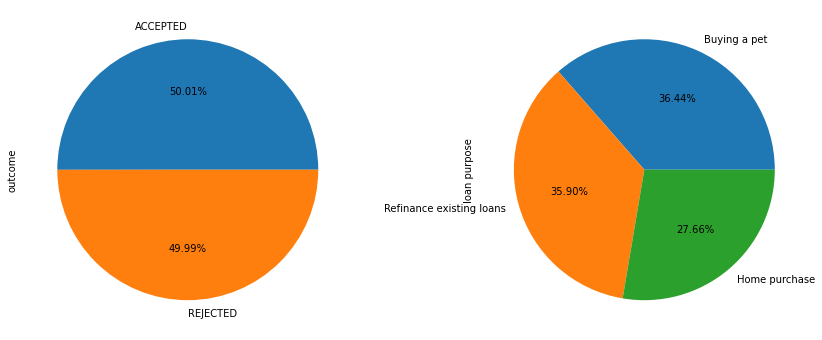

In [77]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cts = Counter(chain.from_iterable(loans.outcome.str.split('|').values))
plt.pie(cts.values(), labels=cts.keys(), autopct='%1.2f%%')
plt.ylabel('outcome')

plt.subplot(1, 2, 2)
loanscts = Counter(chain.from_iterable(loans.loan_purpose.str.split('|').values))
plt.pie(loanscts.values(), labels=loanscts.keys(), autopct='%1.2f%%')
plt.ylabel('loan purpose')
plt.show()

plt.show()

# 1ST MERGE

In [79]:
# LOANS & CUSTOMERS

In [80]:
merge1 = loans.merge(customers, on=['user_id'])

In [81]:
merge1.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  80486719  33593540  1530499615       250000             Home purchase   
2  36469880  41352735  1508888134       270000  Refinance existing loans   
3  68931135  41352735  1568087139       280000  Refinance existing loans   
4  22554526  70055796  1507064389       240000             Home purchase   

    outcome  interest webvisit_id            datetime        date  \
0  ACCEPTED       8.7          -1 2017-10-28 05:42:29  2017-10-28   
1  REJECTED       7.0          -1 2018-07-02 04:46:55  2018-07-02   
2  REJECTED       6.7    72572646 2017-10-25 01:35:34  2017-10-25   
3  REJECTED       8.7          -1 2019-09-10 05:45:39  2019-09-10   
4  ACCEPTED       7.0    54404642 2017-10-03 22:59:49  2017-10-03   

                       name          ssn    birthday gender     city zip_code  \
0  Δράκων-Δαμιανός Μητρίδης  826-19-7609  1983-05-06      M    Λαμία   379 88   
1  Δράκων-Δαμιανός Μητρίδης  826-19-7609  1983-05-06      M    Λαμία   379 88   
2             Κομνηνή Βρακά  388-36-2125  1984-10-13      F   Σπάρτη       32   
3             Κομνηνή Βρακά  388-36-2125  1984-10-13      F   Σπάρτη       32   
4      Ελπίς-Λυδία Παυλίδου  506-77-6759  1984-07-14      F  Λιβαδιά       45   

   year_birthday city_ascii  
0           1983      Lamia  
1           1983      Lamia  
2           1984     Sparte  
3           1984     Sparte  
4           1984    Libadia

In [82]:
len(merge1)

14520

In [83]:
merge1.loan_id.value_counts()

39476417    2
12867945    2
52607839    2
9546870     1
10365594    1
           ..
85282679    1
35740492    1
29666108    1
33070848    1
55004298    1
Name: loan_id, Length: 14517, dtype: int64

In [84]:
# 3-row longer than the loans df because 3 loans are linked to two user_id, as we mention previously

In [85]:
merge1[merge1['loan_id'] == 39476417]

loan_id   user_id   timestamp  loan_amount   loan_purpose   outcome  \
9920  39476417  81570228  1533324503       170000  Home purchase  ACCEPTED   
9921  39476417  81570228  1533324503       170000  Home purchase  ACCEPTED   

      interest webvisit_id            datetime        date  \
9920       6.7          -1 2018-08-03 21:28:23  2018-08-03   
9921       6.7          -1 2018-08-03 21:28:23  2018-08-03   

                           name          ssn    birthday gender     city  \
9920            Μηνάς Σαμανίδης  016-05-9161  1985-12-17      M  Πρέβεζα   
9921  Ιππόλυτος Παπαδημητριάδης  428-19-7759  1978-10-05      M    Ξάνθη   

     zip_code  year_birthday city_ascii  
9920       75           1985    Prebeza  
9921       32           1978    Ksanthe

In [86]:
merge1[merge1['loan_id'] == 12867945]

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
9918  12867945  81570228  1530675563        40000  Refinance existing loans   
9919  12867945  81570228  1530675563        40000  Refinance existing loans   

       outcome  interest webvisit_id            datetime        date  \
9918  ACCEPTED       8.7          -1 2018-07-04 05:39:23  2018-07-04   
9919  ACCEPTED       8.7          -1 2018-07-04 05:39:23  2018-07-04   

                           name          ssn    birthday gender     city  \
9918            Μηνάς Σαμανίδης  016-05-9161  1985-12-17      M  Πρέβεζα   
9919  Ιππόλυτος Παπαδημητριάδης  428-19-7759  1978-10-05      M    Ξάνθη   

     zip_code  year_birthday city_ascii  
9918       75           1985    Prebeza  
9919       32           1978    Ksanthe

In [87]:
merge1[merge1['loan_id'] == 52607839]

loan_id   user_id   timestamp  loan_amount  loan_purpose   outcome  \
9916  52607839  81570228  1530535462       220000  Buying a pet  ACCEPTED   
9917  52607839  81570228  1530535462       220000  Buying a pet  ACCEPTED   

      interest webvisit_id            datetime        date  \
9916      14.0    25919562 2018-07-02 14:44:22  2018-07-02   
9917      14.0    25919562 2018-07-02 14:44:22  2018-07-02   

                           name          ssn    birthday gender     city  \
9916            Μηνάς Σαμανίδης  016-05-9161  1985-12-17      M  Πρέβεζα   
9917  Ιππόλυτος Παπαδημητριάδης  428-19-7759  1978-10-05      M    Ξάνθη   

     zip_code  year_birthday city_ascii  
9916       75           1985    Prebeza  
9917       32           1978    Ksanthe

In [88]:
# we can observe that there 3 times the same user_id and same loan_id for two persons

In [89]:
merge1.head()

loan_id   user_id   timestamp  loan_amount              loan_purpose  \
0   9546870  33593540  1509162149        80000              Buying a pet   
1  80486719  33593540  1530499615       250000             Home purchase   
2  36469880  41352735  1508888134       270000  Refinance existing loans   
3  68931135  41352735  1568087139       280000  Refinance existing loans   
4  22554526  70055796  1507064389       240000             Home purchase   

    outcome  interest webvisit_id            datetime        date  \
0  ACCEPTED       8.7          -1 2017-10-28 05:42:29  2017-10-28   
1  REJECTED       7.0          -1 2018-07-02 04:46:55  2018-07-02   
2  REJECTED       6.7    72572646 2017-10-25 01:35:34  2017-10-25   
3  REJECTED       8.7          -1 2019-09-10 05:45:39  2019-09-10   
4  ACCEPTED       7.0    54404642 2017-10-03 22:59:49  2017-10-03   

                       name          ssn    birthday gender     city zip_code  \
0  Δράκων-Δαμιανός Μητρίδης  826-19-7609  1983-05-06      M    Λαμία   379 88   
1  Δράκων-Δαμιανός Μητρίδης  826-19-7609  1983-05-06      M    Λαμία   379 88   
2             Κομνηνή Βρακά  388-36-2125  1984-10-13      F   Σπάρτη       32   
3             Κομνηνή Βρακά  388-36-2125  1984-10-13      F   Σπάρτη       32   
4      Ελπίς-Λυδία Παυλίδου  506-77-6759  1984-07-14      F  Λιβαδιά       45   

   year_birthday city_ascii  
0           1983      Lamia  
1           1983      Lamia  
2           1984     Sparte  
3           1984     Sparte  
4           1984    Libadia

In [90]:
np.round(len(merge1.user_id.unique())/len(customers)*100, 2)

98.23

In [91]:
merge1.user_id.value_counts()

81570228    6
33593540    2
90854549    2
32083657    2
81818419    2
           ..
23534415    1
43667194    1
4099686     1
40802511    1
481546      1
Name: user_id, Length: 9823, dtype: int64

# 2ND MERGE

In [92]:
merge2 = merge1.merge(visits, left_on=['webvisit_id'], right_on=['visit_id'])

In [93]:
merge2.head()

loan_id   user_id  timestamp_x  loan_amount              loan_purpose  \
0  36469880  41352735   1508888134       270000  Refinance existing loans   
1  22554526  70055796   1507064389       240000             Home purchase   
2    644608  29541965   1509054465        20000             Home purchase   
3    644608  29541965   1509054465        20000             Home purchase   
4    644608  29541965   1509054465        20000             Home purchase   

    outcome  interest webvisit_id          datetime_x      date_x  ...  \
0  REJECTED       6.7    72572646 2017-10-25 01:35:34  2017-10-25  ...   
1  ACCEPTED       7.0    54404642 2017-10-03 22:59:49  2017-10-03  ...   
2  REJECTED       7.0    72004328 2017-10-26 23:47:45  2017-10-26  ...   
3  REJECTED       7.0    72004328 2017-10-26 23:47:45  2017-10-26  ...   
4  REJECTED       7.0    72004328 2017-10-26 23:47:45  2017-10-26  ...   

  zip_code year_birthday city_ascii  visit_id timestamp_y  referrer  \
0       32          1984     Sparte  72572646  1537462173    Google   
1       45          1984    Libadia  54404642  1537696530   Twitter   
2   062 02          1973   Amphissa  72004328  1514645526    Google   
3   062 02          1973   Amphissa  72004328  1532953984    Google   
4   062 02          1973   Amphissa  72004328  1542110846  Facebook   

   campaign_name          datetime_y      date_y    month  
0       display2 2018-09-20 18:49:33  2018-09-20  2018-09  
1       display3 2018-09-23 11:55:30  2018-09-23  2018-09  
2       display3 2017-12-30 15:52:06  2017-12-30  2017-12  
3       display1 2018-07-30 14:33:04  2018-07-30  2018-07  
4       display1 2018-11-13 13:07:26  2018-11-13  2018-11  

[5 rows x 25 columns]

In [94]:
len(merge2)

10801

In [95]:
# so there is some loans with several rows refer to it because a user can go several times on website

In [96]:
merge2.loan_id.value_counts()

2193101     5
76715818    5
11414579    5
86629631    5
89258311    5
           ..
19609555    1
49158006    1
75923186    1
3954296     1
14092903    1
Name: loan_id, Length: 3609, dtype: int64

In [97]:
merge2[merge2.loan_id == 2193101]

loan_id   user_id  timestamp_x  loan_amount              loan_purpose  \
3394  2193101  76122400   1543217099       150000  Refinance existing loans   
3395  2193101  76122400   1543217099       150000  Refinance existing loans   
3396  2193101  76122400   1543217099       150000  Refinance existing loans   
3397  2193101  76122400   1543217099       150000  Refinance existing loans   
3398  2193101  76122400   1543217099       150000  Refinance existing loans   

       outcome  interest webvisit_id          datetime_x      date_x  ...  \
3394  ACCEPTED       6.7    22352083 2018-11-26 08:24:59  2018-11-26  ...   
3395  ACCEPTED       6.7    22352083 2018-11-26 08:24:59  2018-11-26  ...   
3396  ACCEPTED       6.7    22352083 2018-11-26 08:24:59  2018-11-26  ...   
3397  ACCEPTED       6.7    22352083 2018-11-26 08:24:59  2018-11-26  ...   
3398  ACCEPTED       6.7    22352083 2018-11-26 08:24:59  2018-11-26  ...   

     zip_code year_birthday      city_ascii  visit_id timestamp_y  referrer  \
3394   983 52          1982  Alexandroupole  22352083  1509774974  Facebook   
3395   983 52          1982  Alexandroupole  22352083  1517613001    Google   
3396   983 52          1982  Alexandroupole  22352083  1549547144    Google   
3397   983 52          1982  Alexandroupole  22352083  1559798307   Twitter   
3398   983 52          1982  Alexandroupole  22352083  1559870420  Facebook   

      campaign_name          datetime_y      date_y    month  
3394       display1 2017-11-04 06:56:14  2017-11-04  2017-11  
3395       display3 2018-02-03 00:10:01  2018-02-03  2018-02  
3396       display3 2019-02-07 14:45:44  2019-02-07  2019-02  
3397       display2 2019-06-06 07:18:27  2019-06-06  2019-06  
3398       display2 2019-06-07 03:20:20  2019-06-07  2019-06  

[5 rows x 25 columns]

In [98]:
merge2 = merge2.sort_values(by=['datetime_x', 'datetime_y'])

In [99]:
merge2.head()

loan_id   user_id  timestamp_x  loan_amount              loan_purpose  \
301  28111073  58208231   1506849736       200000  Refinance existing loans   
564  23095964  18891893   1506863740       210000              Buying a pet   
565  23095964  18891893   1506863740       210000              Buying a pet   
342  25181941  23654628   1506887871       150000             Home purchase   
343  25181941  23654628   1506887871       150000             Home purchase   

      outcome  interest webvisit_id          datetime_x      date_x  ...  \
301  REJECTED      14.0    11493715 2017-10-01 11:22:16  2017-10-01  ...   
564  REJECTED       7.0      910992 2017-10-01 15:15:40  2017-10-01  ...   
565  REJECTED       7.0      910992 2017-10-01 15:15:40  2017-10-01  ...   
342  REJECTED       8.7    60850011 2017-10-01 21:57:51  2017-10-01  ...   
343  REJECTED       8.7    60850011 2017-10-01 21:57:51  2017-10-01  ...   

    zip_code year_birthday   city_ascii  visit_id timestamp_y  referrer  \
301   892 90          1995  Egoumenitsa  11493715  1507529214  Facebook   
564   627 31          1986       Athena    910992  1521257133   Twitter   
565   627 31          1986       Athena    910992  1560755886    Google   
342   710 24          1979     Komotene  60850011  1526215039   Twitter   
343   710 24          1979     Komotene  60850011  1539146698   Twitter   

     campaign_name          datetime_y      date_y    month  
301       display1 2017-10-09 08:06:54  2017-10-09  2017-10  
564       display1 2018-03-17 04:25:33  2018-03-17  2018-03  
565       display1 2019-06-17 09:18:06  2019-06-17  2019-06  
342       display3 2018-05-13 14:37:19  2018-05-13  2018-05  
343       display1 2018-10-10 06:44:58  2018-10-10  2018-10  

[5 rows x 25 columns]

In [100]:
print(f'There is {np.round(len(merge2.loan_id.unique())/len(loans)*100,2)} % loans retrieved in this final dataframe on the whole loans dataset')

There is 24.86 % loans retrieved in this final dataframe on the whole loans dataset


In [101]:
print(f'The mean of visits number per customer is about {np.round(merge2.groupby("user_id")["datetime_y"].count().mean(), 2)}')

The mean of visits number per customer is about 3.27
